<a href="https://colab.research.google.com/github/Tasmia062/CSE-475-4--2021-2-60-062/blob/main/CSE475(Lab1_task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSE475(4)

**Name :**Tasmia Islam

**ID :** 2021-2-60-062

**Lab 1 Task - Decision Tree and Random Forest**

Perform  Mango leaf diseases classification using Random Forest and Decision Tree.

**Dataset :** https://data.mendeley.com/datasets/hxsnvwty3r/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy scikit-learn pillow

In [ ]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!gdown --id 1yikBlsFwU6NMRnERQTABU4BoW898lGWf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gdown/download.py:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1yikBlsFwU6NMRnERQTABU4BoW898lGWf

but Gdown can't. Please check connections and permissions.


In [ ]:
image_dir = "/content/drive/MyDrive/MangoLeafBD Dataset"
labels = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

In [ ]:
# Define image size for resizing
image_size = (220, 220)
data = []
labels = []

# Specify your dataset folder path
dataset_folder_path = "/content/drive/MyDrive/MangoLeafBD Dataset"

# Loop through each class folder
for class_label in os.listdir(dataset_folder_path):
    class_folder = os.path.join(dataset_folder_path, class_label)
    if os.path.isdir(class_folder):  # Ensure it's a folder
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                # Open, resize, and convert to RGB
                img = Image.open(image_path).resize(image_size).convert('RGB')
                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(class_label)  # Label from folder name
            except Exception as e:
                print(f"Could not process! {image_path}: {e}")

# Convert lists to numpy arrays for easier processing
data = np.array(data)
labels = np.array(labels)



In [ ]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3200, 43200)
Test set shape: (800, 43200)


**Decision Tree**

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 69.50%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Random Forest**

In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees

# Train the model
rf_clf.fit(X_train, y_train)
print("Model training completed")

Model training completed


In [ ]:
# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf * 100:.2f}%")

Model Accuracy: 89.88%


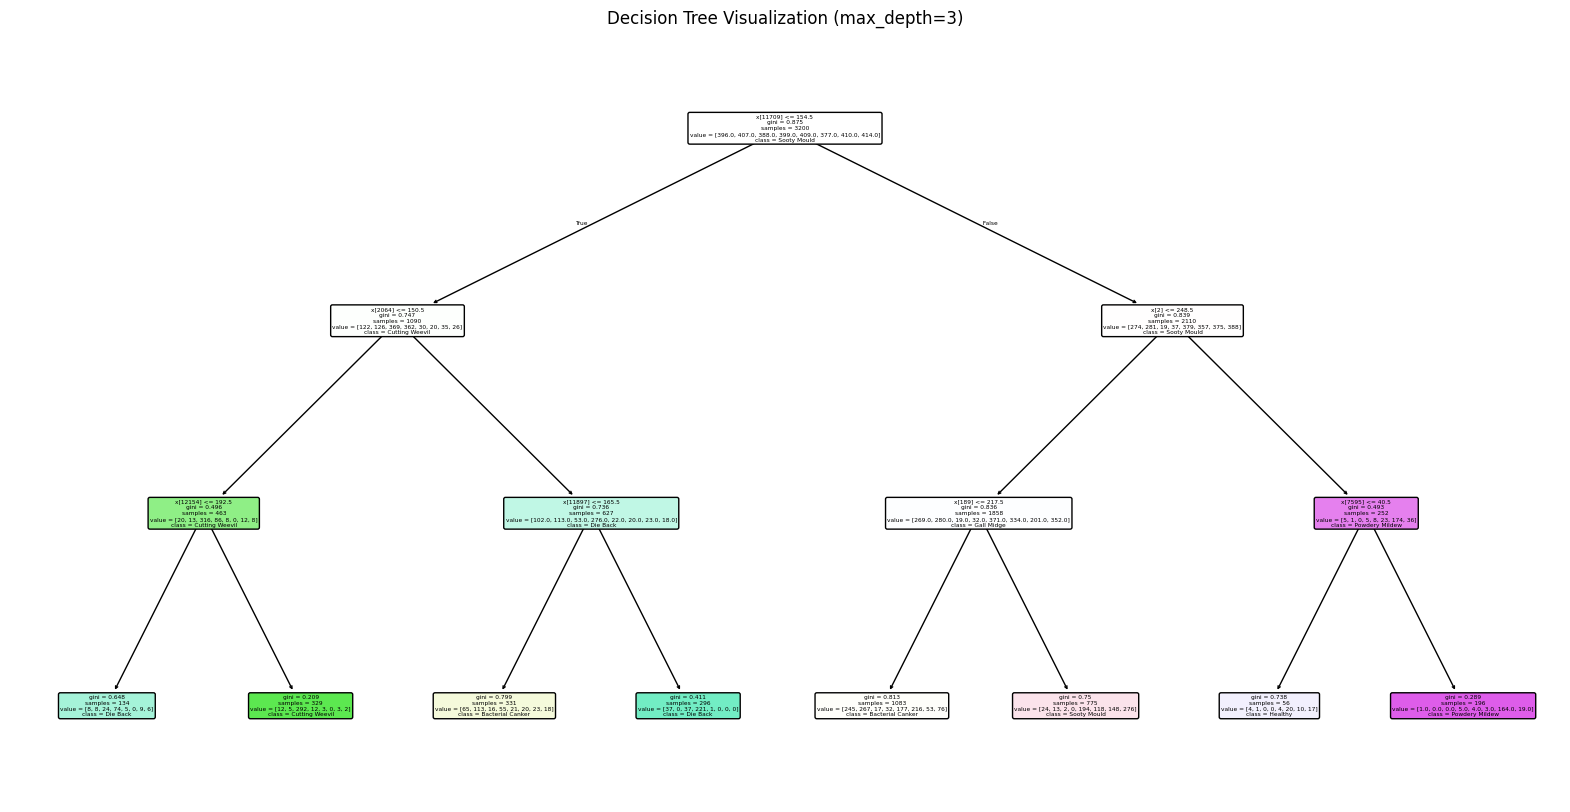

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a smaller Decision Tree for better visualization
clf_small = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_small.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf_small, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

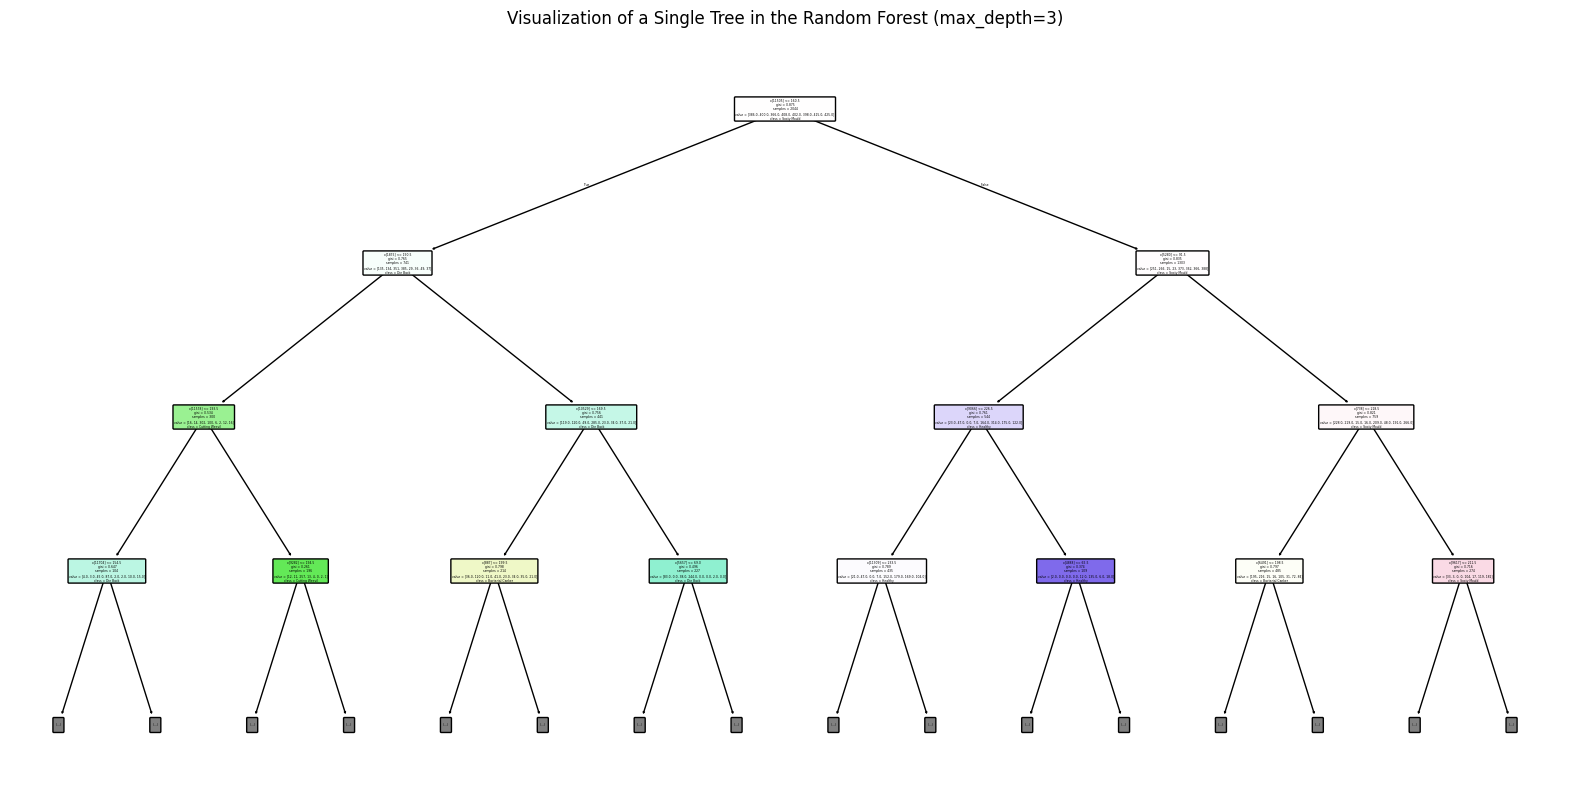

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Select a single tree from the Random Forest
tree = rf_clf.estimators_[0]  # You can change the index to view other trees

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True, max_depth=3)
plt.title("Visualization of a Single Tree in the Random Forest (max_depth=3)")
plt.show()

**Comment :** For the given dataset Random Forest performs better than Decision Tree achieving an accuracy of 89.62%, while Decision Tree's accuracy is 69.25%.